# <font color=red> Capstone Project   --- House Prices: Advanced Regression Techniques

#### <font color=red> by Ryan Mark

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

import warnings
warnings.filterwarnings('ignore')

C:\Users\ryanmark\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Assign csv files to designated names
file1 = 'train.csv'
file2 = 'test.csv'

In [3]:
# Read files and assign df names
train_df = pd.read_csv(file1)
test_df  = pd.read_csv(file2)

In [4]:
# print shape of each df
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [5]:
# View the columns of the train_df
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# View entire columns for the top 5 rows
pd.set_option('display.max_columns', None)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# percentage of each value type under MSZoning
train_df['MSZoning'].value_counts(normalize=True)*100

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

In [8]:
# train_df column info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# test_df column info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

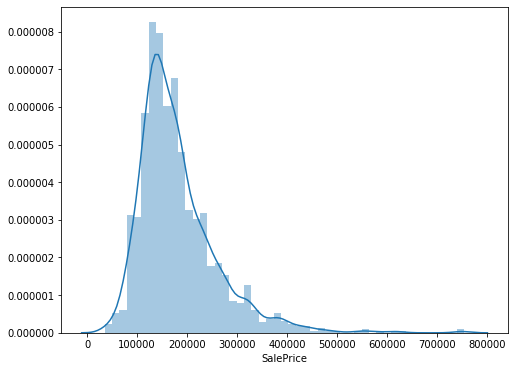

In [10]:
# Distribution plot of SalePrice (target variable)
plt.figure(figsize=(8,6))
sns.distplot(train_df['SalePrice'])
plt.show()

In [11]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
# SalePrice correlation to other columns. Sorted in descending order
sp_corr = pd.DataFrame(train_df.corr()['SalePrice'])
sp_corr.sort_values(by='SalePrice',ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


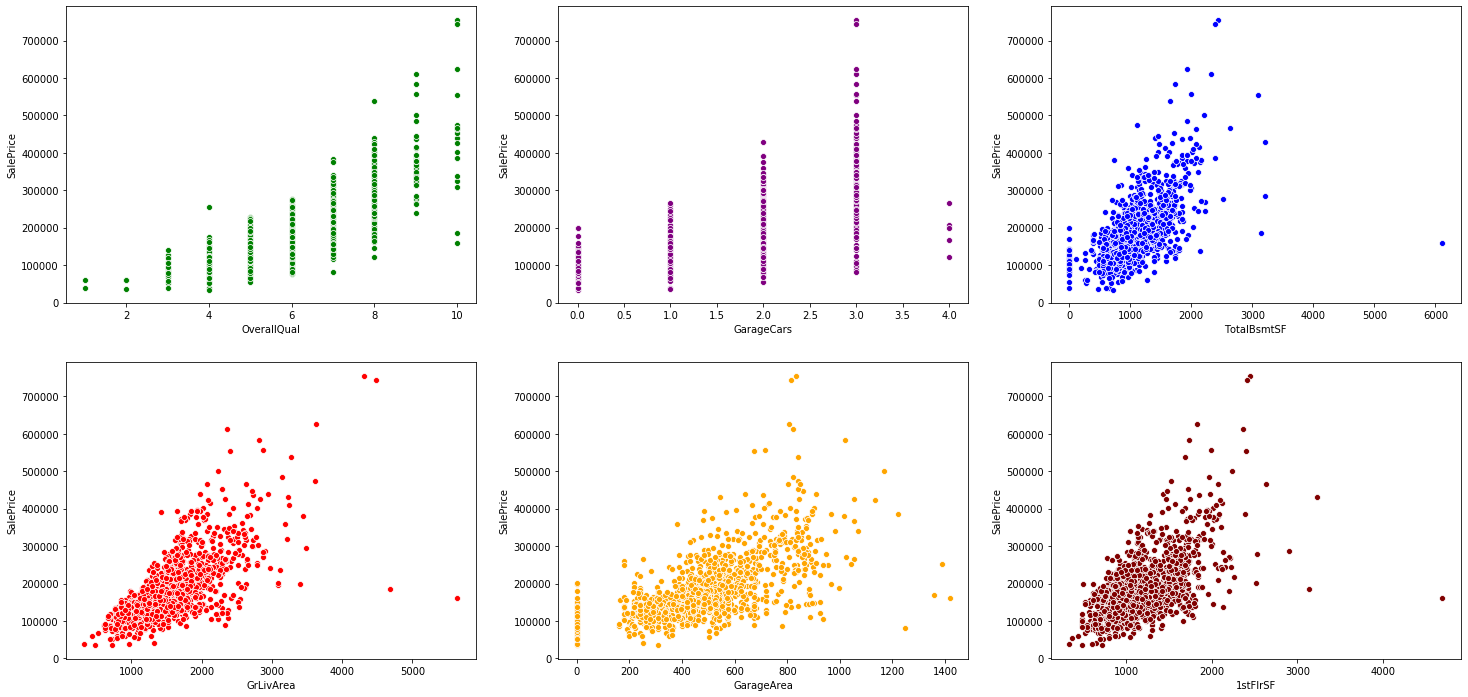

In [13]:
# Top 6 correlated columns to SalePrice graphed
fig, axes = plt.subplots(2, 3, figsize=(25, 12), sharex=False)

sns.scatterplot(x='OverallQual', y='SalePrice' ,data=train_df, color='green',ax=axes[0, 0])
sns.scatterplot(x='GrLivArea', y='SalePrice' ,data=train_df, color='red',ax=axes[1, 0])
sns.scatterplot(x='GarageCars', y='SalePrice' ,data=train_df, color='purple',ax=axes[0, 1])
sns.scatterplot(x='GarageArea', y='SalePrice' ,data=train_df, color='orange',ax=axes[1, 1])
sns.scatterplot(x='TotalBsmtSF', y='SalePrice' ,data=train_df, color='blue',ax=axes[0, 2])
sns.scatterplot(x='1stFlrSF', y='SalePrice' ,data=train_df, color='maroon',ax=axes[1, 2])

plt.show()

In [14]:
# Count / % of data missing
null = train_df.isnull().sum()
percent = round(train_df.isnull().sum() / len(train_df),3)*100
missing_data = pd.concat([null, percent], axis=1, keys=['Total', '%'])
non_zero = missing_data.sort_values(by='%',ascending=False).head(20)
non_zero[non_zero>0]

,Total,%
PoolQC,1453.0,99.5
MiscFeature,1406.0,96.3
Alley,1369.0,93.8
Fence,1179.0,80.8
FireplaceQu,690.0,47.3
LotFrontage,259.0,17.7
GarageYrBlt,81.0,5.5
GarageCond,81.0,5.5
GarageType,81.0,5.5
GarageFinish,81.0,5.5


In [15]:
# drop columns with missing data > 81
train_df = train_df.drop((missing_data[missing_data['Total']>81]).index,1)

train_df.shape

(1460, 75)

In [16]:
# Count / % of data missing
null = test_df.isnull().sum()
percent = round(test_df.isnull().sum() / len(test_df),3)*100
missing_data = pd.concat([null, percent], axis=1, keys=['Total', '%'])
non_zero = missing_data.sort_values(by='%',ascending=False).head(20)
non_zero[non_zero>0]

,Total,%
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageQual,78,5.3
GarageCond,78,5.3
GarageYrBlt,78,5.3
GarageFinish,78,5.3


In [17]:
# drop columns with missing data > 78
test_df = test_df.drop((missing_data[missing_data['Total']>78]).index,1)

test_df.shape

(1459, 74)

In [18]:
# seperate object, int64, and float64 columns
df_a = train_df.select_dtypes(include=['object']).copy()
df_b = train_df.select_dtypes(include=['int64']).copy()
df_c = train_df.select_dtypes(include=['float64']).copy()

df_d = test_df.select_dtypes(include=['object']).copy()
df_e = test_df.select_dtypes(include=['int64']).copy()
df_f = test_df.select_dtypes(include=['float64']).copy()

df_a_final = pd.get_dummies(df_a)
df_d_final = pd.get_dummies(df_d)

# concat df's into a main df
train_df = pd.concat([ df_b], axis=1)
test_df = pd.concat([ df_e], axis=1)

In [19]:
# validate changes
train_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

In [21]:
# validate changes
test_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,896,0,0,896,1,0,2,1,5,0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,1329,0,0,1329,1,1,3,1,6,0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,928,701,0,1629,2,1,3,1,6,1,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,926,678,0,1604,2,1,3,1,7,1,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,1280,0,0,1280,2,0,2,1,5,0,0,82,0,0,144,0,0,1,2010


In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1459 non-null   int64
 1   MSSubClass     1459 non-null   int64
 2   LotArea        1459 non-null   int64
 3   OverallQual    1459 non-null   int64
 4   OverallCond    1459 non-null   int64
 5   YearBuilt      1459 non-null   int64
 6   YearRemodAdd   1459 non-null   int64
 7   1stFlrSF       1459 non-null   int64
 8   2ndFlrSF       1459 non-null   int64
 9   LowQualFinSF   1459 non-null   int64
 10  GrLivArea      1459 non-null   int64
 11  FullBath       1459 non-null   int64
 12  HalfBath       1459 non-null   int64
 13  BedroomAbvGr   1459 non-null   int64
 14  KitchenAbvGr   1459 non-null   int64
 15  TotRmsAbvGrd   1459 non-null   int64
 16  Fireplaces     1459 non-null   int64
 17  WoodDeckSF     1459 non-null   int64
 18  OpenPorchSF    1459 non-null   int64
 19  Enclos

In [23]:
train_df.shape

(1460, 35)

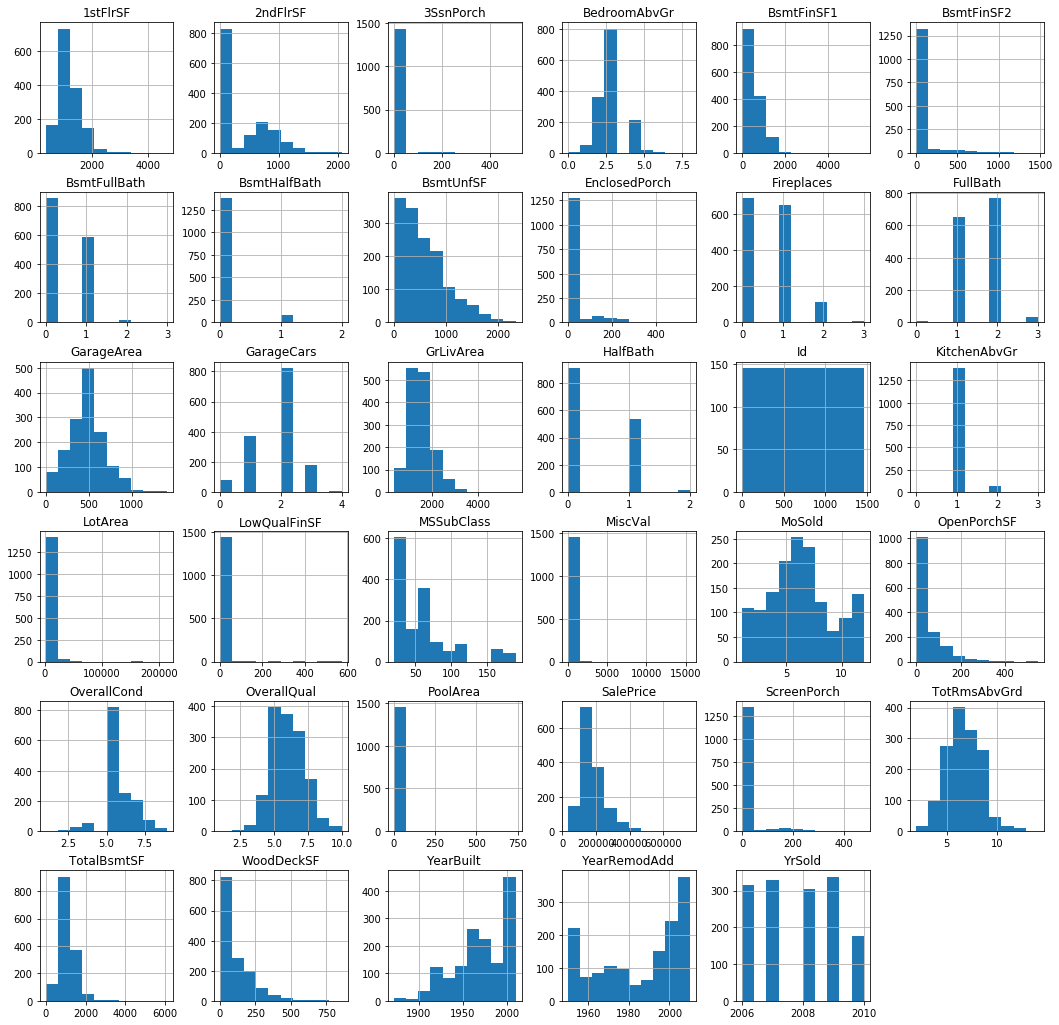

In [24]:
# Histograms of the train data set
train_df.hist(figsize=(18,18))
plt.show()

In [25]:
test_df.shape

(1459, 26)

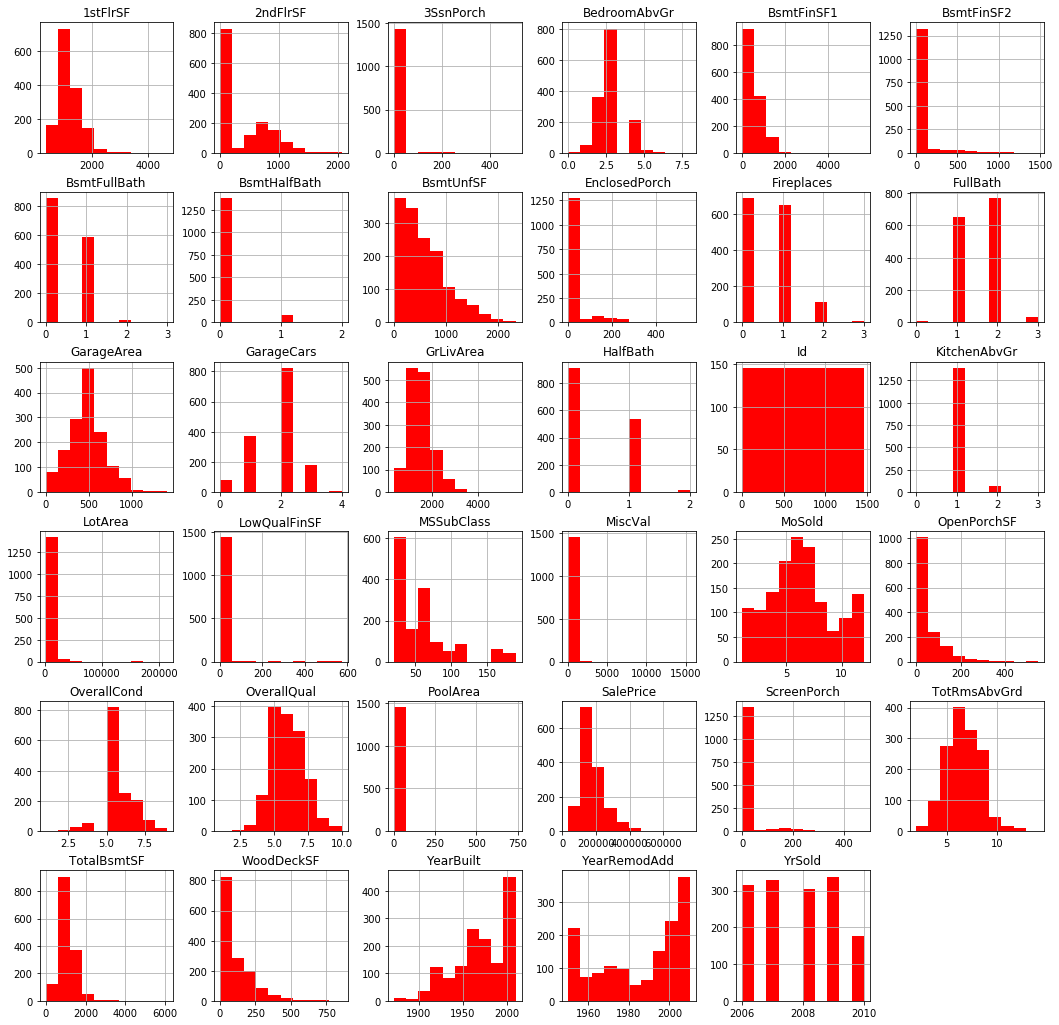

In [26]:
# Histograms of the test data set
train_df.hist(figsize=(18,18),color='red')
plt.show()

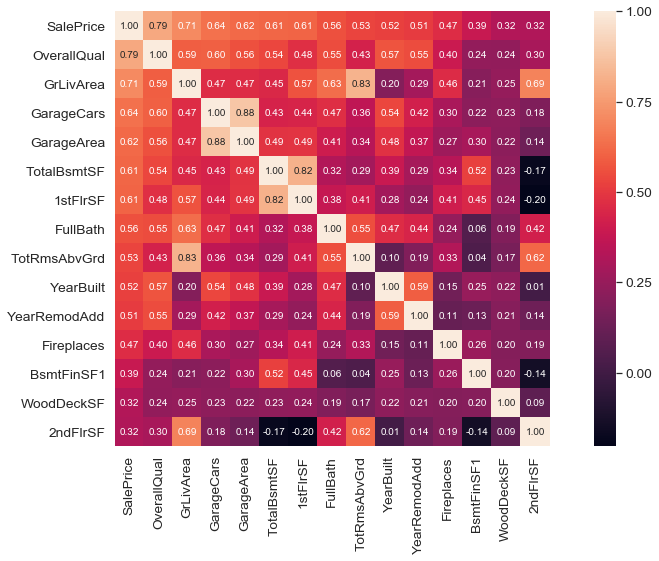

In [27]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train_df.corr()

# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# <font color=red> Scaling

In [28]:
predictor_cols = ['FullBath', 'YearBuilt','OverallQual','GrLivArea','1stFlrSF','FullBath','TotRmsAbvGrd','YearRemodAdd','Fireplaces']

train_y = train_df['SalePrice'].values.reshape(-1,1)
train_X = train_df[predictor_cols].values
test_X = test_df[predictor_cols].values

In [29]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

train_X = rs.fit_transform(train_X)
train_y = rs.fit_transform(train_y)
test_X = rs.fit_transform(test_X)

# <font color=red> Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

lr = LinearRegression()
lr.fit(train_X, train_y)

# Implement Cross Validation
lr_kfold = KFold(n_splits=10)
lr_scores = cross_val_score(lr, train_X, train_y, cv=lr_kfold, scoring='neg_mean_squared_error')
lr_mse_scores = -lr_scores
lr_RMSE_scores = np.sqrt(lr_mse_scores)
lr_results = format(lr_RMSE_scores.mean(),'.8f')
print('Linear Regression RMSE:',lr_results)

Linear Regression RMSE: 0.45350653


# <font color=red> Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score

rr = Ridge(alpha=.01)
rr.fit(train_X, train_y)

# Implement Cross Validation
rr_kfold = KFold(n_splits=10)
rr_scores = cross_val_score(rr, train_X, train_y, cv=rr_kfold, scoring='neg_mean_squared_error')
rr_mse_scores = -rr_scores
rr_RMSE_scores = np.sqrt(rr_mse_scores)
rr_results = format(rr_RMSE_scores.mean(),'.8f')
print('Ridge Regression RMSE:',rr_results)

Ridge Regression RMSE: 0.45350630


# <font color=red> Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(train_X, train_y)

# Implement Cross Validation
rf_kfold = KFold(n_splits=10)
rf_scores = cross_val_score(rf, train_X, train_y, cv=rf_kfold, scoring='neg_mean_squared_error')
rf_mse_scores = -rf_scores
rf_RMSE_scores = np.sqrt(rf_mse_scores)
rf_results = format(rf_RMSE_scores.mean(),'.8f')
print('Random Forest RMSE:',rf_results)

Random Forest RMSE: 0.37205446


# <font color=red> Gradient Boosting Regressor

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(train_X, train_y)

# Implement Cross Validation
gbr_kfold = KFold(n_splits=10)
gbr_scores = cross_val_score(gbr, train_X, train_y, cv=gbr_kfold, scoring='neg_mean_squared_error')
gbr_mse_scores = -gbr_scores
gbr_RMSE_scores = np.sqrt(gbr_mse_scores)
gbr_results = format(gbr_RMSE_scores.mean(),'.8f')
print('Gradient Boosting RMSE:',gbr_results)

Gradient Boosting RMSE: 0.35140190


# <font color=red> Format for submission

In [34]:
# Apply the inverse transformation 
lr_prediction = rs.inverse_transform(test_X)
lr_prediction

# re-run the prediction based on the unscaled data
lr_prediction = lr.predict(lr_prediction).reshape(-1,1)

# View the unscaled prediction values
lr_prediction

# Validate the length of the updated prediction values
len(lr_prediction)

# Assign the predicted values to a dataframe
x = lr_prediction
lr_prediction = pd.DataFrame.from_records(x)
lr_prediction

# combine the test id's and predicted values into a dataframe
lr_final = pd.DataFrame({'Id': test_df['Id'],'SalePrice': lr_prediction[0]})
lr_final

# Final output to a csv file
lr_final.to_csv('lr_final_ryan_mark.csv',index=False)

In [35]:
# Apply the inverse transformation 
rr_prediction = rs.inverse_transform(test_X)
rr_prediction

# re-run the prediction based on the unscaled data
rr_prediction = rr.predict(rr_prediction).reshape(-1,1)

# View the unscaled prediction values
rr_prediction

# Validate the length of the updated prediction values
len(rr_prediction)

# Assign the predicted values to a dataframe
x = rr_prediction
rr_prediction = pd.DataFrame.from_records(x)
rr_prediction

# combine the test id's and predicted values into a dataframe
rr_final = pd.DataFrame({'Id': test_df['Id'],'SalePrice': rr_prediction[0]})
rr_final

# Final output to a csv file
rr_final.to_csv('rr_final_ryan_mark.csv',index=False)

In [36]:
# Apply the inverse transformation 
rf_prediction = rs.inverse_transform(test_X)
rf_prediction

# re-run the prediction based on the unscaled data
rf_prediction = rf.predict(rf_prediction).reshape(-1,1)

# View the unscaled prediction values
rf_prediction

# Validate the length of the updated prediction values
len(rf_prediction)

# Assign the predicted values to a dataframe
x = rf_prediction
rf_prediction = pd.DataFrame.from_records(x)
rf_prediction

# combine the test id's and predicted values into a dataframe
rf_final = pd.DataFrame({'Id': test_df['Id'],'SalePrice': rf_prediction[0]})
rf_final

# Final output to a csv file
rf_final.to_csv('rf_final_ryan_mark.csv',index=False)

In [37]:
# Apply the inverse transformation 
gbr_prediction = rs.inverse_transform(test_X)
gbr_prediction

# re-run the prediction based on the unscaled data
gbr_prediction = gbr.predict(gbr_prediction).reshape(-1,1)

# View the unscaled prediction values
gbr_prediction

# Validate the length of the updated prediction values
len(gbr_prediction)

# Assign the predicted values to a dataframe
x = gbr_prediction
gbr_prediction = pd.DataFrame.from_records(x)
gbr_prediction

# combine the test id's and predicted values into a dataframe
gbr_final = pd.DataFrame({'Id': test_df['Id'],'SalePrice': gbr_prediction[0]})
gbr_final

# Final output to a csv file
gbr_final.to_csv('gbr_final_ryan_mark.csv',index=False)

# <font color=red> Graphs

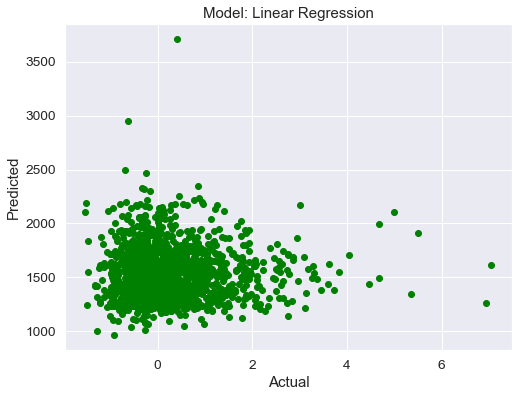

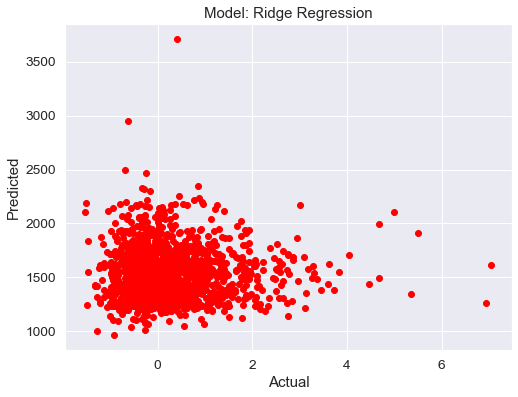

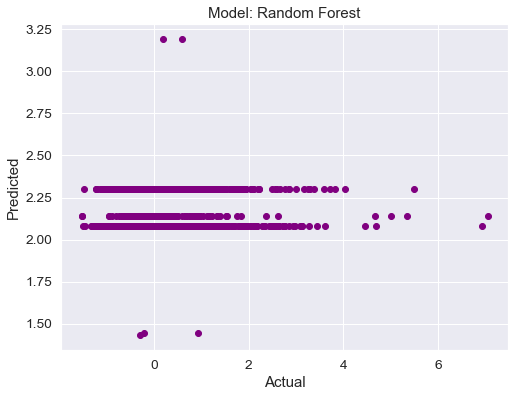

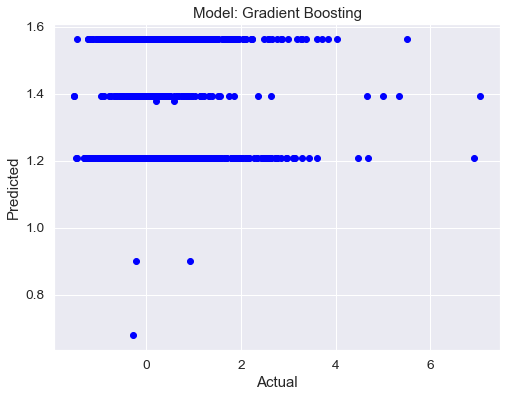

In [38]:
plt.figure(figsize=(8,6))
plt.plot( train_y[0:1459], lr_prediction , 'o', color = 'green')
plt.title('Model: Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

plt.figure(figsize=(8,6))
plt.plot( train_y[0:1459], rr_prediction , 'o', color = 'red')
plt.title('Model: Ridge Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

plt.figure(figsize=(8,6))
plt.plot( train_y[0:1459], rf_prediction , 'o', color = 'purple')
plt.title('Model: Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

plt.figure(figsize=(8,6))
plt.plot( train_y[0:1459], gbr_prediction , 'o', color = 'blue')
plt.title('Model: Gradient Boosting')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

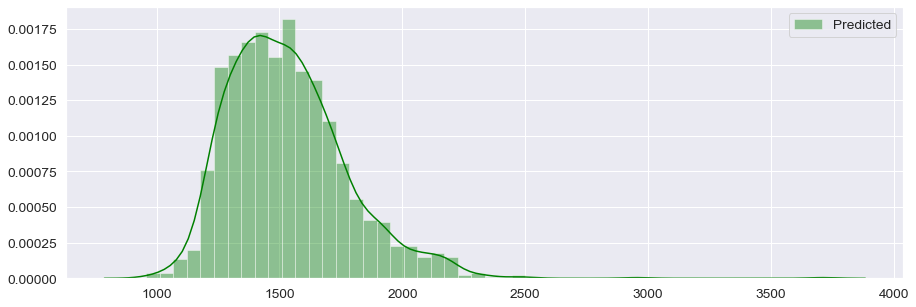

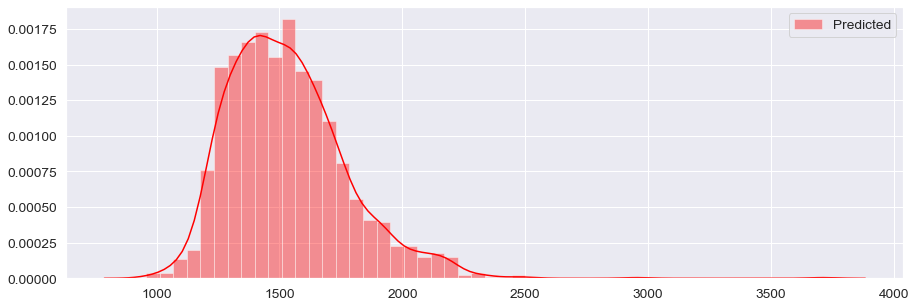

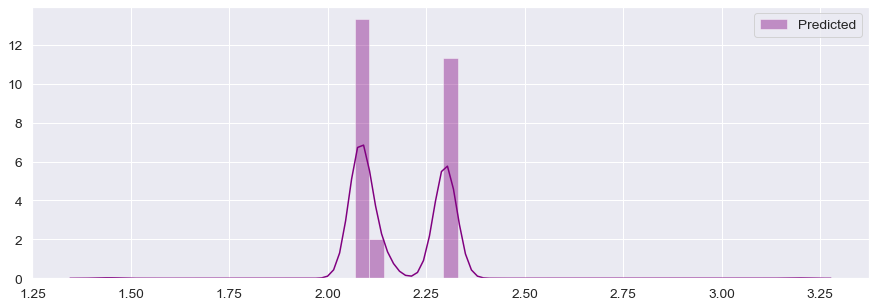

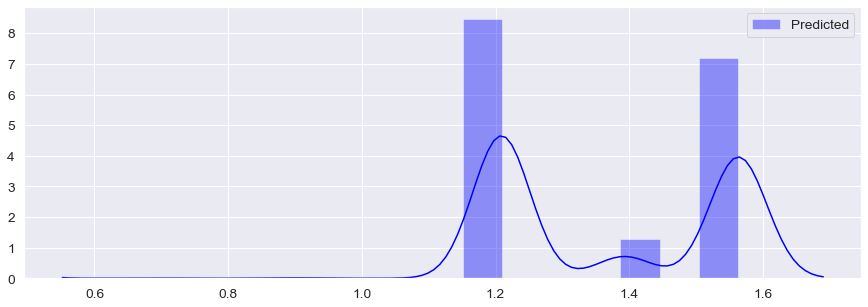

In [39]:
# dist plot overlap
plt.figure(figsize=(15, 5))
sns.distplot(lr_final['SalePrice'], label='Predicted', axlabel = False, color='green')
plt.legend()
plt.show()

# dist plot overlap
plt.figure(figsize=(15, 5))
sns.distplot(rr_final['SalePrice'], label='Predicted', axlabel = False, color='red')
plt.legend()
plt.show()

# dist plot overlap
plt.figure(figsize=(15, 5))
sns.distplot(rf_final['SalePrice'], label='Predicted', axlabel = False, color='purple')
plt.legend()
plt.show()

# dist plot overlap
plt.figure(figsize=(15, 5))
sns.distplot(gbr_final['SalePrice'], label='Predicted', axlabel = False, color='blue')
plt.legend()
plt.show()

# <font color=red> Non-Scaled Values

In [40]:
# non-scaled data
predictor_cols = ['FullBath', 'YearBuilt','OverallQual','GrLivArea','1stFlrSF','FullBath','TotRmsAbvGrd','YearRemodAdd','Fireplaces']

train_y1 = train_df['SalePrice'].values.reshape(-1,1)
train_X1 = train_df[predictor_cols].values
test_X1 = test_df[predictor_cols].values

# <font color=red> Random Forest - Non-Scaled

In [41]:
# run the Random Forest test
from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor()
rf2.fit(train_X1, train_y1)

# Implement Cross Validation
rf_kfold2 = KFold(n_splits=10)
rf_scores2 = cross_val_score(rf2, train_X1, train_y1, cv=rf_kfold2, scoring='neg_mean_squared_error')
rf_mse_scores2 = -rf_scores2
rf_RMSE_scores2 = np.sqrt(rf_mse_scores2)
rf_results2 = format(rf_RMSE_scores2.mean(),'.3f')
print('Random Forest RMSE:',rf_results2)

Random Forest RMSE: 31599.128


In [42]:
x = rf.predict(test_X1)
x

array([2.08272074, 2.08272074, 2.29849783, ..., 2.29849783, 2.08272074,
       2.29849783])

In [43]:
# combine the test id's and predicted values into a dataframe
rf_final2 = pd.DataFrame({'Id': test_df['Id'],'SalePrice': x})
rf_final2

,Id,SalePrice
0,1461,2.082721
1,1462,2.082721
2,1463,2.298498
3,1464,2.298498
4,1465,2.082721
...,...,...
1454,2915,2.082721
1455,2916,2.082721
1456,2917,2.298498
1457,2918,2.082721


In [44]:
# Final output to a csv file
rf_final2.to_csv('rf_final_ryan_mark_test.csv',index=False)

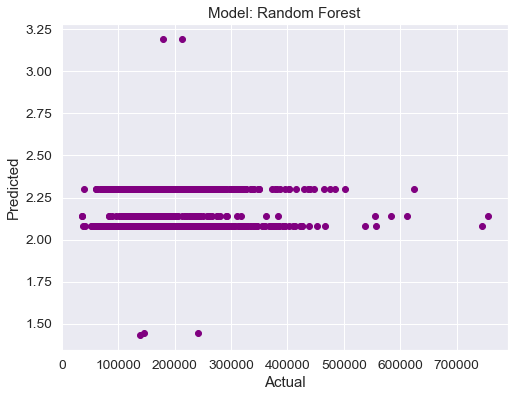

In [45]:
plt.figure(figsize=(8,6))
plt.plot( train_y1[0:1459], x , 'o', color = 'purple')
plt.title('Model: Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

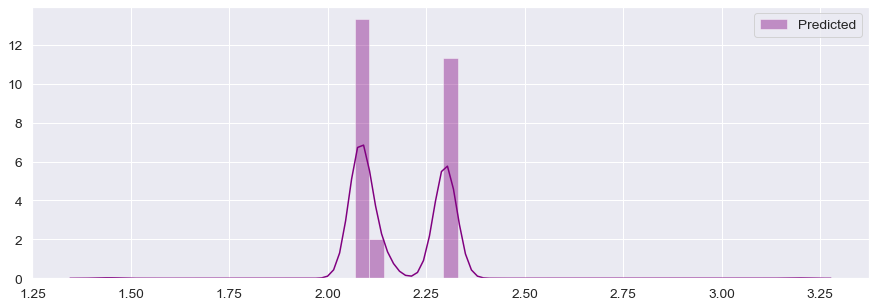

In [46]:
# dist plot overlap
plt.figure(figsize=(15, 5))
sns.distplot(rf_final2['SalePrice'], label='Predicted', axlabel = False, color='purple')
plt.legend()
plt.show()

# <font color=red> Gradient Boosting  - Non-Scaled

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gbr2 = GradientBoostingRegressor()
gbr2.fit(train_X1, train_y1)

# Implement Cross Validation
gbr2_kfold = KFold(n_splits=10)
gbr_scores2 = cross_val_score(gbr2, train_X1, train_y1, cv=gbr2_kfold, scoring='neg_mean_squared_error')
gbr_mse_scores2 = -gbr_scores2
gbr_RMSE_scores2 = np.sqrt(gbr_mse_scores2)
gbr_results2 = format(gbr_RMSE_scores2.mean(),'.3f')
print('Gradient Boosting RMSE:',gbr_results2)

Gradient Boosting RMSE: 29833.608


In [48]:
x = gbr.predict(test_X1)
x

array([1.20881376, 1.20881376, 1.56331091, ..., 1.56331091, 1.20881376,
       1.56331091])

In [49]:
# combine the test id's and predicted values into a dataframe
gbr_final2 = pd.DataFrame({'Id': test_df['Id'],'SalePrice': x})
gbr_final2

,Id,SalePrice
0,1461,1.208814
1,1462,1.208814
2,1463,1.563311
3,1464,1.563311
4,1465,1.208814
...,...,...
1454,2915,1.208814
1455,2916,1.208814
1456,2917,1.563311
1457,2918,1.208814


In [50]:
# Final output to a csv file
gbr_final2.to_csv('gbr_final_ryan_mark_test.csv',index=False)

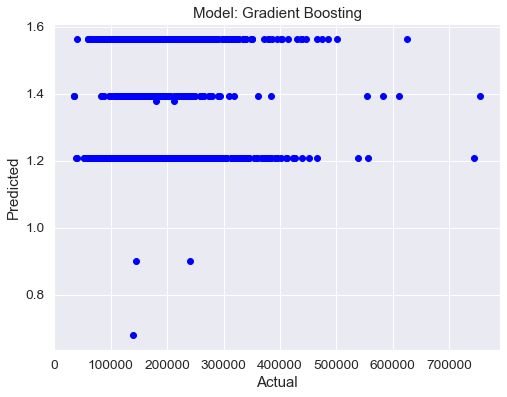

In [51]:
plt.figure(figsize=(8,6))
plt.plot( train_y1[0:1459], x , 'o', color = 'blue')
plt.title('Model: Gradient Boosting')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

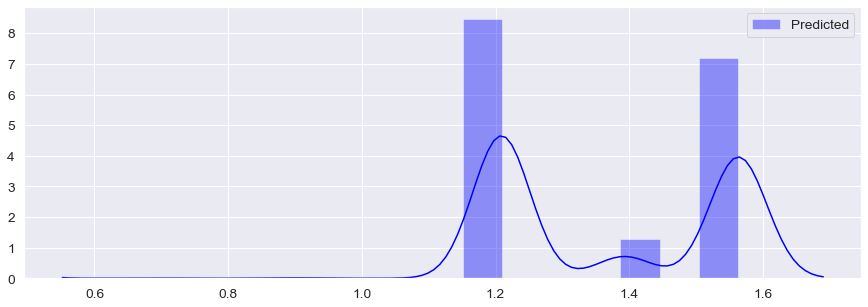

In [52]:
# dist plot overlap
plt.figure(figsize=(15, 5))
sns.distplot(gbr_final2['SalePrice'], label='Predicted', axlabel = False, color='blue')
plt.legend()
plt.show()

# <font color=red> Results

In [53]:
data = {'Model':        ['Linear Regression','Ridge Regression', 'Random Forest', 'Gradient Boosting', 'Random Forest_2', 'Gradient Boosting_2'],
        'RMSE Score':   [.454, .454, .378, .354, 31341.180, 29687.793],
        'Kaggle Score': [4.70255, 4.70256, 10.76463, 11.21304, .16601 ,.16468],
        'Scaling?':      ['Scaled','Scaled','Scaled','Scaled','Not Scaled','Not Scaled',]
       }

results = pd.DataFrame(data, columns = ['Model', 'RMSE Score','Kaggle Score', 'Scaling?'])
results.style.highlight_max(color='red').highlight_min(color='green')

,Model,RMSE Score,Kaggle Score,Scaling?
0,Linear Regression,0.454000,4.702550,Scaled
1,Ridge Regression,0.454000,4.702560,Scaled
2,Random Forest,0.378000,10.764630,Scaled
3,Gradient Boosting,0.354000,11.213040,Scaled
4,Random Forest_2,31341.180000,0.166010,Not Scaled
5,Gradient Boosting_2,29687.793000,0.164680,Not Scaled
